**Mini Project**

## Mercedes-Benz Greener Manufacturing
***
Objective : To predict the time taken to test the car

In this competition, Daimler is challenging to tackle the curse of dimensionality and reduce
the time that cars spend on the test bench.

***Submitted By : Saikiran. Pasikanti***

<space>

## (1) Importing the Data

In [1]:
# Importing pandas for dataframes
import pandas as pd 
import os

In [2]:
# Set directory
os.chdir("C:/Users/Sai/Desktop/PYTHON_007/Assignments/MiniProject")

# Importing the CSV file
train = pd.read_csv("train.csv")

In [3]:
# Check the records of the data set
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(4209, 378)

In [5]:
#This will extract only numeric/binary columns from the data set

num_cols = train._get_numeric_data().columns
print(num_cols)

Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


In [6]:
# Following are the categorical columns present in the data set

cat_cols = list( set(train) -  set(num_cols) )
print(cat_cols)

['X4', 'X8', 'X5', 'X3', 'X1', 'X6', 'X0', 'X2']


Size of Dataset = rows x columns = 4209 x 378

This Data set contains
    - 1 ID Column
    - 1 Dependent Column
    - 376 Independent Columns
        - 8 Categorical Columns (X0, X1, X2, X3, X4, X5, X6, X8)
        - 368 Binary Columns

In [7]:
#train.describe

### Understanding the data

Regression problem = because there is a need to predict continous variable

<br>An accurate model will be able to reduce the total time spent testing vehicles by allowing cars with similar testing configurations to be run successively. 

- The training 4209 vehicle tests obtained by Mercedes for a range of vehicle configurations and a target variable.

- Each vehicle test is defined by the vehicle configuration, which is encoded in a set of features.

- The training dataset contain 376 different vehicle features with names such as ‘X0’, ‘X1’, ‘X2’ and so on.

- All of the features have been anonymized meaning that they do not come with a physical representation. 

The description of the data does indicate that the vehicle features are configuration options such as suspension setting, adaptive cruise control, all-wheel drive, and a number of different options that together define a car model. 



### (2) Exploratory Data Analysis

In [8]:
# Checking for the missing values in the data set

#train.isnull().sum() # No missing values found

`The given data set has no missing values`

In [9]:
# Importing the required visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Target Variable 'y'

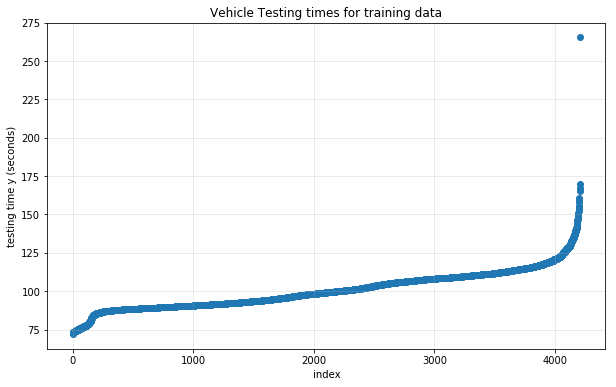

In [10]:
# Plotting target variable y against its count sorted
plt.figure(figsize=(10,6))
plt.scatter(range(train.shape[0]), np.sort(train.y.values))

plt.xlabel('index'); plt.ylabel('testing time y (seconds)'); plt.title("Vehicle Testing times for training data")
plt.grid(alpha=0.3)
plt.show()

- The above plot shows all of the testing times arranged from shortest to longest from left to right.<br>
- The four outliers can be seen at right with the highest value shown in red.<br> 
- Plotting the data demonstrates the extreme nature of this data point more effectively than examining the numbers.<br>

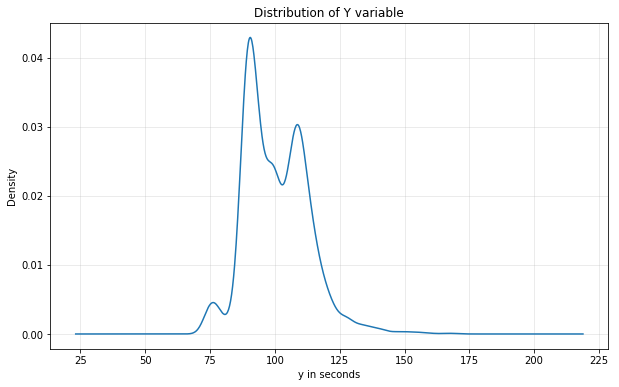

In [11]:
# The testing times can also be visualized as a histogram. 
# For this visualization, the outlying data point has been removed in order to better represent the majority of the data.
train2 = train
train2.drop( train2['y'].idxmax(), axis=0, inplace=True)

# Plotting the distribution of 'y'
plt.figure(figsize=(10,6))
train2['y'].plot.kde()
plt.xlabel('y in seconds')
plt.title('Distribution of Y variable')
plt.grid(alpha=0.3)
plt.show()

- The majority of test durations are between 90 and 100 seconds
- There are peaks in testing times around 97–98 seconds and near 108 seconds.
- The testing times are bi-modal, with two distinct peaks.
- This data is positively skewed, with a long tail stretching into the upper values.

In [12]:
print ("Y :    Min=",train2.y.min(),   "   Mean=",train2.y.mean(),  "   Max=",train2.y.max())

Y :    Min= 72.11    Mean= 100.63019011406833    Max= 169.91


### Categorical Variables

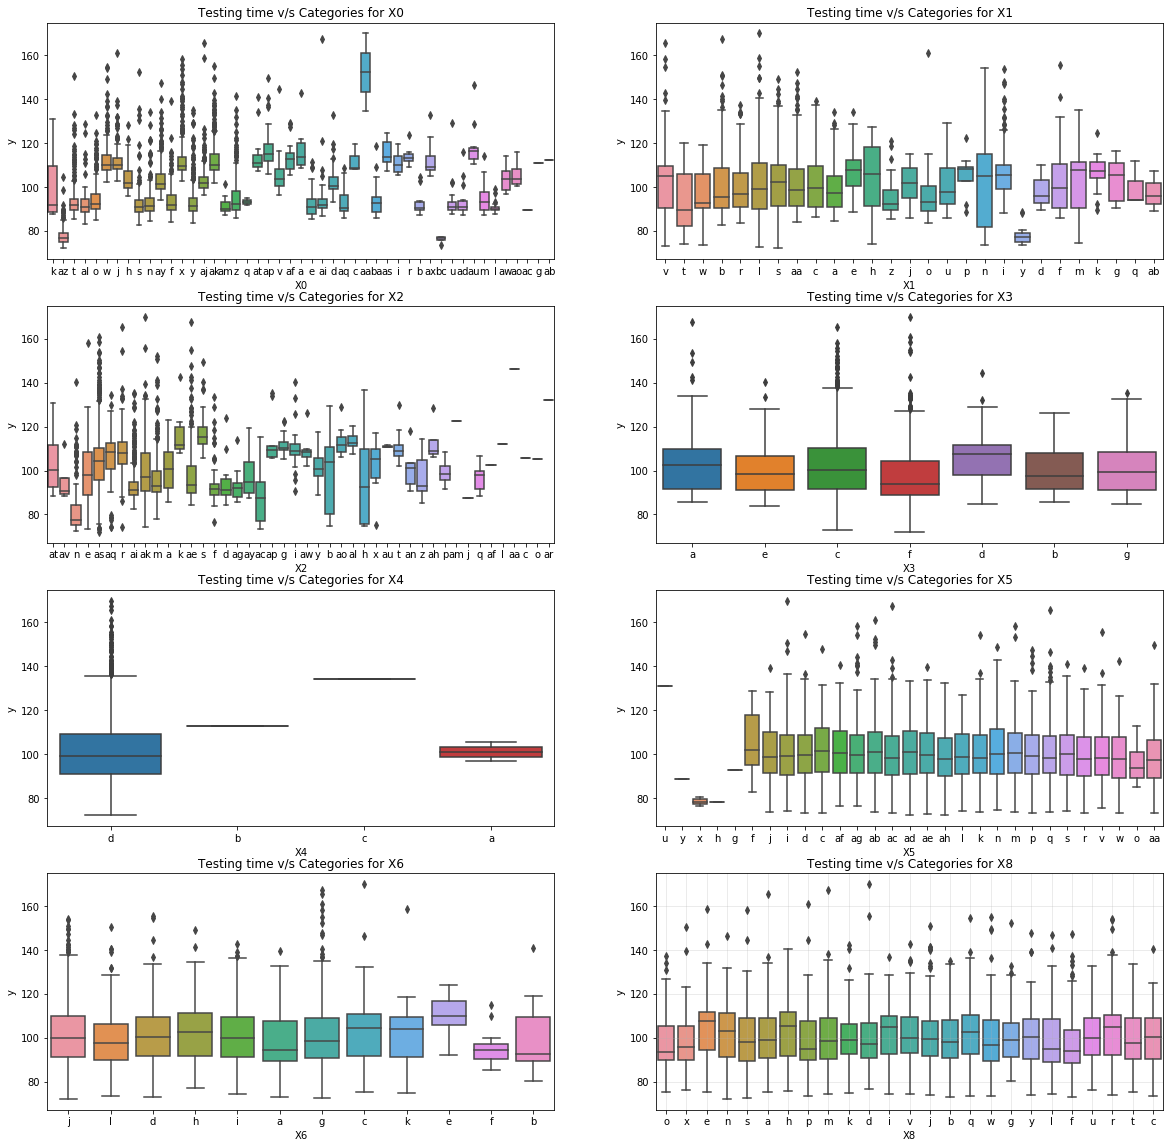

In [13]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
sns.boxplot(data=train, x='X0', y='y',ax=axes[0,0]).set_title("Testing time v/s Categories for X0", fontsize=12)
sns.boxplot(data=train, x='X1', y='y',ax=axes[0,1]).set_title("Testing time v/s Categories for X1", fontsize=12)
sns.boxplot(data=train, x='X2', y='y',ax=axes[1,0]).set_title("Testing time v/s Categories for X2", fontsize=12)
sns.boxplot(data=train, x='X3', y='y',ax=axes[1,1]).set_title("Testing time v/s Categories for X3", fontsize=12)
sns.boxplot(data=train, x='X4', y='y',ax=axes[2,0]).set_title("Testing time v/s Categories for X4", fontsize=12)
sns.boxplot(data=train, x='X5', y='y',ax=axes[2,1]).set_title("Testing time v/s Categories for X5", fontsize=12)
sns.boxplot(data=train, x='X6', y='y',ax=axes[3,0]).set_title("Testing time v/s Categories for X6", fontsize=12)
sns.boxplot(data=train, x='X8', y='y',ax=axes[3,1]).set_title("Testing time v/s Categories for X8", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

- There are no discernible trends within the categorical variables with respect to vehicle testing duration. 
- Moreover, it is diffcult to draw intuitive conclusions from this because the features have no physical representation

### Binary Variables

In [14]:
train3 = train[num_cols]
train3.drop(['ID','y'], axis=1, inplace=True)
train3.head()

C:\Users\Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
r = train3.sum()
result = r.sort_values()
display(result[368:])
print(result[:30])

Series([], dtype: int64)

X235    0
X293    0
X290    0
X233    0
X289    0
X330    0
X347    0
X93     0
X268    0
X107    0
X11     0
X297    0
X259    1
X260    1
X295    1
X270    1
X280    1
X288    1
X42     1
X190    1
X204    1
X207    1
X210    1
X257    1
X39     1
X33     1
X296    1
X339    1
X95     1
X15     2
dtype: int64


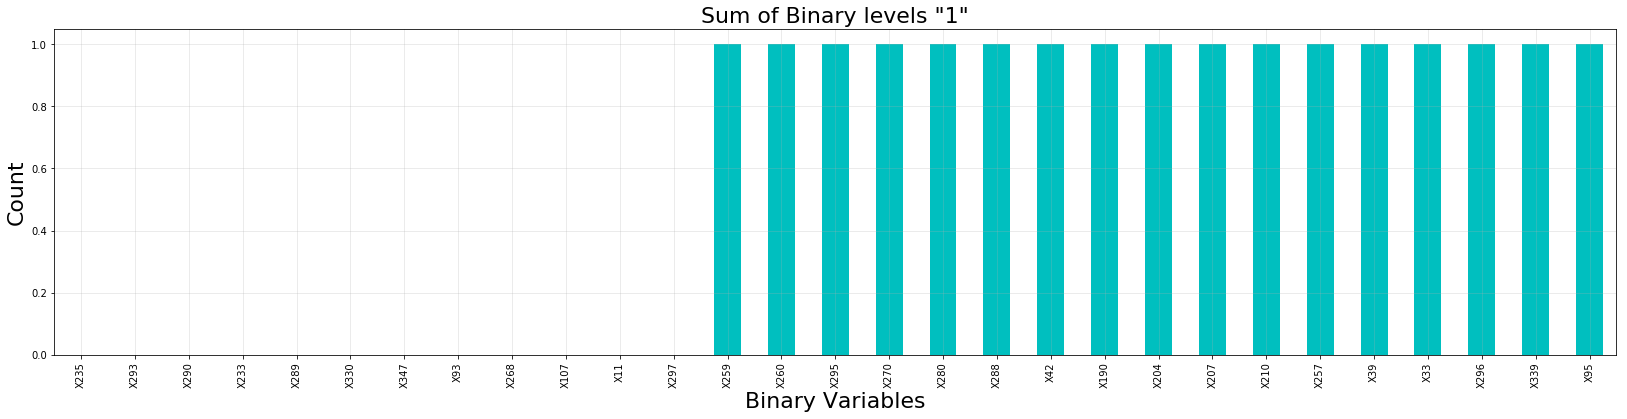

In [16]:
plt.figure(figsize=(28,6))
result[:29].plot.bar(color="C")
plt.xlabel('Binary Variables', fontsize =22)
plt.ylabel('Count', fontsize =22)
plt.title('Sum of Binary levels "1"', fontsize =22)
plt.grid(alpha=0.3)
plt.show()

- Above plot shows that columns X235 to X297 have counts "0"=0 and "1"=4207
- Columns X259 to X190 have counts "0"=1 and "1"=4206

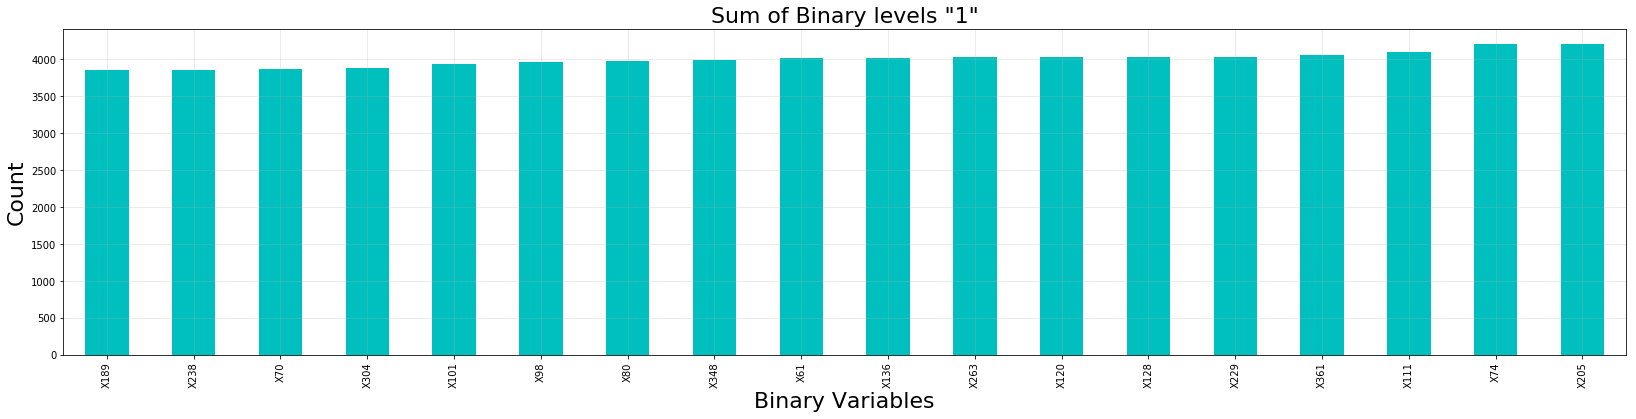

In [17]:
plt.figure(figsize=(28,6))
result[350:].plot.bar(color="C")
plt.xlabel('Binary Variables', fontsize =22)
plt.ylabel('Count', fontsize =22)
plt.title('Sum of Binary levels "1"', fontsize =22)
plt.grid(alpha=0.3)
plt.show()

- All above variables have more than 3500 number of '1' binary counts

- Looking further into the numerical data for the testing set, 12 binary variables where the values were either all 1 or 0. 
- As there is no variation in these features, they have no predictive power and therefore, these 12 features may be removed

<space>

## Inferences:
1. One outlier, as determined by vehicle testing duration, needs to be removed
2. 12 binary variables encode no information and should be removed
3. There are no noticeable trends within the categorical or binary variables
4. Unsupervised dimensionality reduction (PCA) will need to beperformed on the data

## (3) Data Processing

One-hot encoding the categorical variables, removing the outliers, and removing features that do not encode any information.

There is no trends within the variables.
So, it is not possible to create brand new features by combining existing features 

Number of features may be reduced.

For reducing the number of features, Principal Components Analysis (PCA) is used which is an unsupervised technique that does not require an
understanding of the physical representation of the features.

### Using PCA for Dimensionality Reduction

PCA creates a set of basis vectors that represent the dimensions along which the original data has the greatest variation.<br>
In other words, the original data is projected onto a new axis with the greatest variance in order to reduce the dimensions
while preserving the maximum amount of information

In [18]:
# Import for PCA and numpy
from sklearn.decomposition import PCA
import numpy as np

In [19]:
# Cleaning the data for dimensional reduction
train3 = pd.get_dummies(train)

train3.drop(np.argmax(train3['y']), axis=0, inplace=True)

y = np.array(train3['y'])

train3.drop(['ID'], axis=1, inplace=True)
X_train2 = np.array(train3)

C:\Users\Sai\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [20]:
from sklearn.preprocessing import StandardScaler

# Scale the data for analysis
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train2)

In [21]:
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(0)
my_matrix = np.random.randn(20, 5)

# PCA model from scikit
my_model = PCA(n_components=540)
my_model.fit_transform(X_train_std)

#print (my_model.explained_variance_)
#print (my_model.explained_variance_ratio_)
#print (my_model.explained_variance_ratio_.cumsum())

array([[ 1.32829320e+01, -2.66296948e+00, -1.45900521e+00, ...,
         3.10700669e-18, -2.07755504e-17,  1.62289196e-17],
       [ 1.21536376e-01,  5.70580923e-01,  6.12367682e-01, ...,
         3.10700669e-18, -2.07755504e-17,  1.62289196e-17],
       [ 9.68655803e+00,  2.35168782e+01, -5.13815290e+00, ...,
         1.35637908e-16, -4.99681746e-16,  2.32998624e-16],
       ...,
       [ 1.47371872e-01,  5.35606510e-01,  3.75493420e+00, ...,
        -7.55481385e-17,  5.68909728e-18,  7.87314644e-17],
       [-1.64335340e+00,  8.42275811e-01, -8.08868013e-01, ...,
         1.52872986e-16,  1.70324596e-17, -1.18045495e-16],
       [-1.92191236e+00, -1.20900402e+00, -8.22449633e-01, ...,
         5.71004195e-17, -6.22701890e-17,  2.02948907e-16]])

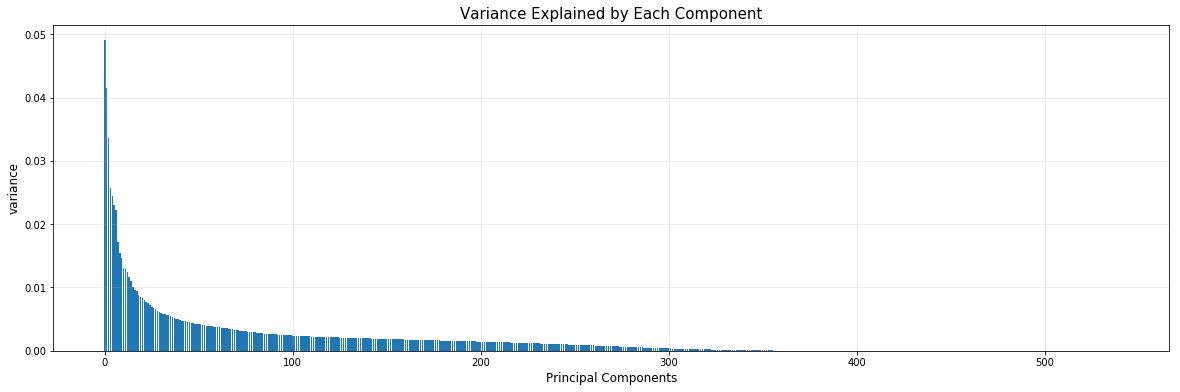

In [22]:
plt.figure(figsize=(20,6))

plt.bar(range(len(my_model.explained_variance_ratio_)), my_model.explained_variance_ratio_)

plt.xlabel('Principal Components', fontsize =12)
plt.ylabel('variance', fontsize =12)
plt.title('Variance Explained by Each Component', fontsize =15)

plt.grid(alpha=0.3)
plt.show()

The first principal component explains the greatest variance in the data, while the second explains the second most and is orthogonal to the first and so on.<br>

A common technique is to keep the number of principal components that explain a given percentage of the variance within a
dataset. 

In [23]:
# Calculate variance ratios
variance = my_model.explained_variance_ratio_

# Cumulative sum of variance explained with [n] features
var=np.cumsum(np.round(my_model.explained_variance_ratio_, decimals=3)*100)
#var

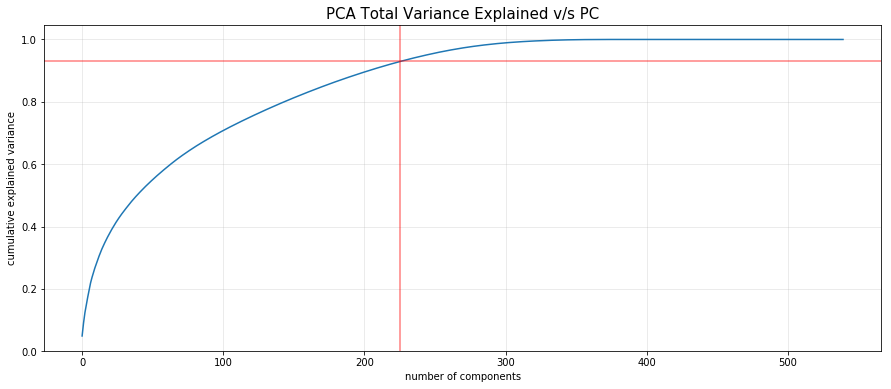

In [24]:
plt.figure(figsize=(15,6))

# Plotting cumulative variance explained for PC
plt.plot(np.cumsum(my_model.explained_variance_ratio_))

plt.title('PCA Total Variance Explained v/s PC' , fontsize =15)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# draw markers
plt.axhline(0.93, color='r', alpha=0.5)
plt.axvline(225, color='r', alpha=0.5)

# Show plot with grid
plt.grid(alpha=0.3)
plt.show()

### Selecting Principal Components that explained 93% of the variation in the data.

The 225 principal components selected explain 93% of the variance in the data.

The PCA algorithm was trained on the training features and then the training features are transformed by projecting the original
features along the first 220 principal components.

Applying PCA considerably reduces the number of dimensions within the data and should lead to improved performance by reducing the noise in the data.

<space>

**This function takes in training, testing dataframes, and number of pca component.<br>
Function returns training numpy array, training targets and testing numpy array**

In [25]:
def process_data(train, n_component=225):
    # One-hot encode categorical variables
    train = pd.get_dummies(train)
    
    # Drop outlier from training data
    train.drop(np.argmax(train['y']), axis=0, inplace=True)
    
    # Assign target values to y
    y = np.array(train['y'])
    
    # Drop ID column and target vales from training and ID from testing
    train.drop(['ID'], axis=1, inplace=True)
    
    # Convert data to numpy arrays
    X_train = np.array(train)
    
    # Perfrom PCA with specified number of components
    pca = PCA(n_components=n_component)
    
    # Train pca on training data and then transform training data
    X_train = pca.fit_transform(X_train)

    # Return the processed data for use in the model
    return X_train,y

<space>

In [26]:
# Create training data, training labels
X_train2, y = process_data(train, n_component=140)

C:\Users\Sai\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


<space>

## (4) Building Model

In [27]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split ( X_train2, y, test_size=0.3, random_state=42 )

As this was a regression task with fewer than 100,000 samples (training data points), there were several starting options.<br>

By refering to the Sci-kit learn algorithm cheat sheet, some model have built as per the cheat sheet

### ElasticNetCV

In [28]:
from sklearn.linear_model import ElasticNetCV

# ElasticNetCV parameters
ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

# ElasticNetCV model
regr = ElasticNetCV(cv=5, random_state=0)

# Training the model
reg2 = regr.fit(X_train, y_train)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on test data
y_pred_enet = reg2.predict(X_test)

# MSE on test data
mse_enet = mean_squared_error(y_test, y_pred_enet)
print("MSE for eNetCV =",mse_enet)

# R Square measure on test data
r2_enet = r2_score(y_test, y_pred_enet)
print("R2  for eNetCV =", r2_enet)

MSE for eNetCV = 0.00610578518102314
R2  for eNetCV = 0.9999600422151603


### ExtraTreesRegressor

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

etr = ensemble.ExtraTreesRegressor(n_jobs=1, random_state=0)

param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20]}

model = GridSearchCV(estimator=etr, param_grid=param_grid, n_jobs=1, cv=10) #, scoring="RMSE")

model.fit(X_train, y_train)

#model.cv_results_
print('Extra trees regression...')

print('Best Params:')
print(model.best_estimator_)

print('Best CV Score:')
print(model.best_score_)

Extra trees regression...
Best Params:
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)
Best CV Score:
0.9996896150556571


In [31]:
# Predicting on test data
y_pred_etr = model.predict(X_test)

# MSE on test data
mse_etr = mean_squared_error(y_test, y_pred_etr)
print("MSE for ETR =",mse_etr)

# R Square measure on test data
r2_etr = r2_score(y_test, y_pred_etr)
print("R2  for ETR =", r2_etr)

MSE for ETR = 0.20968140855106912
R2  for ETR = 0.998627792436296


### XGBoost Model

In [32]:
import xgboost as xgb

In [33]:
# Specify parameters for xgboost regressor
xgb_params = {
    'n_trees': 600,
    'eta': 0.0025,
    'max_depth': 5,
    'subsample': 0.85,
    'objective': 'reg:linear',
    'eval_metric':'rmse',
    'base_score': np.mean(y) # Start off base prediction as mean of target 
}

In [34]:
# Matrixes optimized for xgboost
dtrain = xgb.DMatrix(X_train, y_train)
dtest  = xgb.DMatrix(X_test)

n_boosting_rounds = 1500

In [35]:
# Train the xgboost algorithm
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=n_boosting_rounds)

In [36]:
# Predicting on test data
y_pred_xgb = xgb_model.predict(dtest)

# MSE on test data
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("MSE for xgb =",mse_etr)

# R Square measure on test data
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R2  for xgb =", r2_xgb)

MSE for xgb = 0.20968140855106912
R2  for xgb = 0.9979257140655111


<space>

In [38]:
# Lets make score card for each model in tabular form using pandas
list_of_lists = []
list_of_lists.append(['XGBoost', r2_xgb, mse_xgb])
list_of_lists.append(['ExtraTreesRegressor', r2_etr, mse_etr])
list_of_lists.append(['ElasticNetCV', r2_enet, mse_enet])


#Score = pd.DataFrame(list_of_lists, columns=['Score', 'XGBoost', 'ExtraTreesClassifier','ElasticNetCV'])
Score = pd.DataFrame(list_of_lists, columns=['Model','Test_R Square', 'Test_MSE'])

Score = Score.set_index('Model')
Score

,Test_R Square,Test_MSE
Model,,
XGBoost,0.997926,0.316963
ExtraTreesRegressor,0.998628,0.209681
ElasticNetCV,0.999960,0.006106


Above table shows the performance of model trained on splitted train data set and tested on test data set

ElasticNetCV model explains the time required better than other models

The final model accomplishes the objective of the problem as stated by Mercedes-Benz.<br>
The model is able to explain more than 99% of the variance in the testing data which means that it can account for more than half
of the variation in vehicle testing times based on the vehicle configuration

### References:
- Python Machine Learning, Sebastaina Raschka
- scikitlearn.org